In [1]:
IMAGE_SIZE = 85
BATCH_SIZE = 128
CHANNELS = 2
EPOCHS = 50

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
# from tensorflow_addons.layers import Grayscale

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\DELL\Desktop\Major Project\Prepared_data\train',
    shuffle = True,
    image_size = (IMAGE_SIZE , IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 80653 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names

In [5]:
len(dataset)

631

In [6]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(128, 85, 85, 3)
[1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[39.034046 39.034046 39.034046]
  [39.96844  39.96844  39.96844 ]
  [39.659515 39.659515 39.659515]
  ...
  [79.60139  79.60139  79.60139 ]
  [79.92941  79.92941  79.92941 ]
  [78.03405  78.03405  78.03405 ]]

 [[38.693565 38.693565 38.693565]
  [39.128304 39.128304 39.128304]
  [40.26782  40.26782  40.26782 ]
  ...
  [78.31557  78.31557  78.31557 ]
  [78.       78.       78.      ]
  [76.93315  76.93315  76.93315 ]]

 [[36.597923 36.597923 36.597923]
  [38.76955  38.76955  38.76955 ]
  [41.79239  41.79239  41.79239 ]
  ...
  [77.96886  77.96886  77.96886 ]
  [78.       78.       78.      ]
  [76.07059  76.07059  76.07059 ]]

 ...

 [[39.858826 39.858826 39.858826]
  [40.736336 40.736336 40.736336]
  [39.82353  39.82353  39.82353 ]
  ...
  [67.82353  67.82353  67.82353 ]
  [70.858826 70.858826 70.858826]
  [72.93564  72.93564  72.93564 ]]

 [[41.791977 41.791977 41.791977]
  [41.693565 41.693565 41.693565]
  [39.981316 39.981316 39.981316]
  ...
  [66.01661  66.01661  66.0

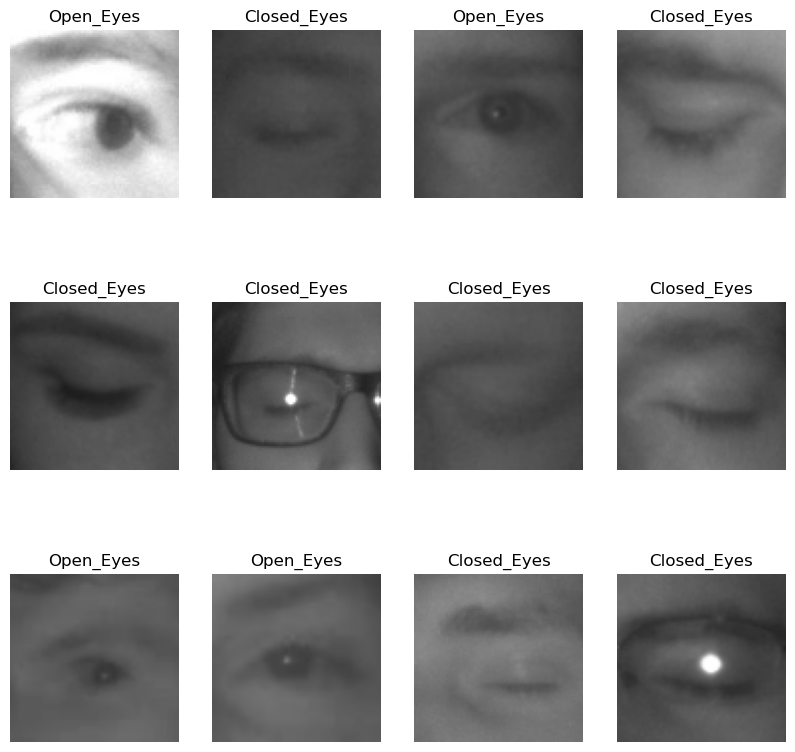

In [8]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [9]:
len(dataset)

631

In [10]:
train_size = 0.8
len(dataset)*train_size

504.8

In [11]:
train_ds = dataset.take(504)
len(train_ds)

504

In [12]:
test_ds = dataset.skip(504)
len(test_ds)

127

In [13]:
val_size = 0.1
len(dataset) * val_size

63.1

In [14]:
val_ds = test_ds.take(63)
len(val_ds)

63

In [15]:
test_ds = test_ds.skip(63)
len(test_ds)

64

In [16]:
def get_dataset_partition_tf(ds , train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size , seed = 12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)

  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds , val_ds , test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [18]:
len(train_ds)

504

In [19]:
len(val_ds)

63

In [20]:
len(test_ds)

64

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/85)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    # layers.Grayscale(),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE , IMAGE_SIZE,3)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(32, kernel_size = (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Conv2D(64, (2,2), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((1,1)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (128, 85, 85, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (128, 85, 85, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (128, 84, 84, 32)      │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (128, 84, 84, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (128, 83, 83, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (128, 83, 83, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (128, 82, 82, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (128, 82, 82, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (128, 81, 81, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (128, 81, 81, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (128, 80, 80, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (128, 80, 80, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (128, 79, 79, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (128, 79, 79, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (128, 78, 78, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (128, 78, 78, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (128, 77, 77, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (128, 77, 77, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (128, 76, 76, 64)      │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (128, 76, 76, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (128, 369664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 64)              │    23,658,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (128, 2)               │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,770,178 (90.68 MB)

 Trainable params: 23,770,178 (90.68 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer = 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


In [28]:
scores = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 388ms/step - accuracy: 0.9019 - loss: 0.3830


In [29]:
scores

[0.3491063416004181, 0.921875]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 36}

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history['accuracy']

[0.5078125,
 0.5034722089767456,
 0.6692708134651184,
 0.8645833134651184,
 0.8975694179534912,
 0.9045138955116272,
 0.9071180820465088,
 0.9123263955116272,
 0.9079861044883728,
 0.9105902910232544]

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

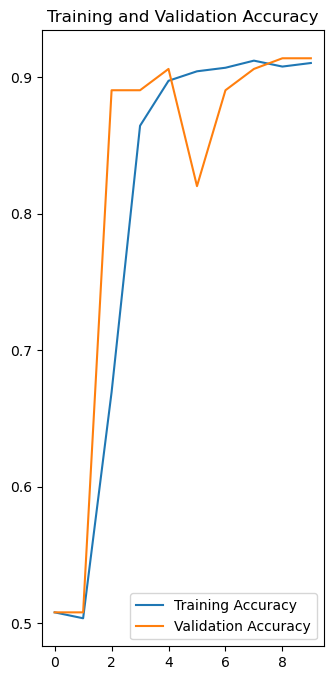

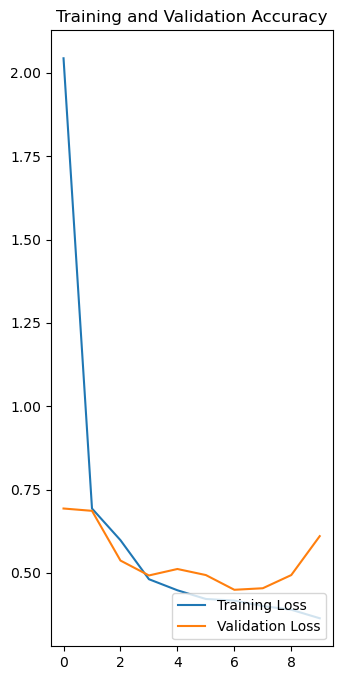

In [35]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

In [36]:
import numpy as np

First image to predict
Actual Label: Open_Eyes
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Predicted_label:  Open_Eyes


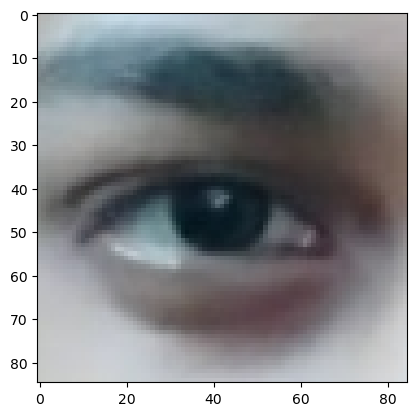

In [40]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual Label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted_label: ", class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model , img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array , 0) #create a batch

  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction[0])]
  confidence = round(100 * (np.max(prediction[0])), 2)

  return predicted_class, confidence

In [42]:
def predict(model , img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array , 0) #create a batch

  prediction = model.predict(img_array)
  predicted_class = class_names[np.argmax(prediction[0])]
  confidence = round(100 * (np.max(prediction[0])), 2)

  return predicted_class, confidence

In [43]:
model_version = 1

In [46]:
model.save(r'C:\Users\DELL\Desktop\Major Project\model\my_model.keras')